# Graded Assignment 2
Mark Klik & Misja Mikkers

# Packages

# Assignment 1

First load the `tidyverse` package:

In [80]:
library(tidyverse)

##  Assignment 1a

Read the data file _graded_assignment_2.csv_ from disk:

In [81]:
data1 <- read.csv2("../Sourcedata/graded_assignment_2.csv")
head(data1)

ID,Group,FKG,DKG,Gender,Elderly,Age
1,9,1,0,male,65-,40-44
2,28,1,1,female,65-,35-39
3,5,1,1,male,65-,20-24
4,23,0,0,female,65-,10-14
5,37,0,0,female,65+,80-84
6,40,1,0,female,65+,95-99


## Assignment 1b

Add column "Health_status" with containing values _1_ (Healthy) and _0_ (Unhealthy).
A person is Healthy, when `FKG` equals 0 and `DKG` equals 0.

So

| FKG | DKG | Health_status   |
|-----|-----|--------------   |
| 0   | 0   | 1               |
| 1   | 0   | 0               |
| 0   | 1   | 0               |
| 1   | 1   | 0               |

Hint: you can use `ifelse()`:

In [82]:
data2 <- data1 %>%
  mutate(Health_status=ifelse((data2$FKG == 0 & data2$DKG ==0), "1", "0"))
head(data2)

ID,Group,FKG,DKG,Gender,Elderly,Age,Health_status
1,9,1,0,male,65-,40-44,0
2,28,1,1,female,65-,35-39,0
3,5,1,1,male,65-,20-24,0
4,23,0,0,female,65-,10-14,1
5,37,0,0,female,65+,80-84,1
6,40,1,0,female,65+,95-99,0


In the next datacamp course you will learn more about the package `dplyr`. For now we just give you some code. You can run the following script.

First, we want to make "Health_status" a factor instead of a character

In [83]:
data2 <- data2 %>%
  mutate(Health_status = as.numeric(Health_status))
str(data2)

'data.frame':	10000 obs. of  8 variables:
 $ ID           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Group        : int  9 28 5 23 37 40 36 23 36 2 ...
 $ FKG          : int  1 1 1 0 0 1 0 1 1 0 ...
 $ DKG          : int  0 1 1 0 0 0 1 0 0 0 ...
 $ Gender       : Factor w/ 2 levels "female","male": 2 1 2 1 1 1 1 1 1 2 ...
 $ Elderly      : Factor w/ 2 levels "65+","65-": 2 2 2 2 1 1 1 2 1 2 ...
 $ Age          : Factor w/ 20 levels "0-4","10-14",..: 8 7 4 2 17 20 16 2 16 10 ...
 $ Health_status: num  0 0 0 1 1 0 0 0 0 1 ...


Then, we want to count the number of healthy and unhealthy males and females

In [84]:
data3 <- data2 %>%
  group_by(Gender, Health_status) %>%
 summarise(Count_observations = n()) %>%
  mutate(Health_status=as.factor(Health_status))

data3

Gender,Health_status,Count_observations
female,0,3646
female,1,1297
male,0,3815
male,1,1242


## Assignment 2

Recreate with the dataframe "data3" the following barchart ![](../Sourcedata/barchart.png)

* Hint: see for changing the [legends and colors](http://www.cookbook-r.com/Graphs/Legends_(ggplot2)/)
* Hint: the "green" color is in fact the color "greenyellow"
* Hint: see for the [themes](http://ggplot2.tidyverse.org/reference/ggtheme.html): 



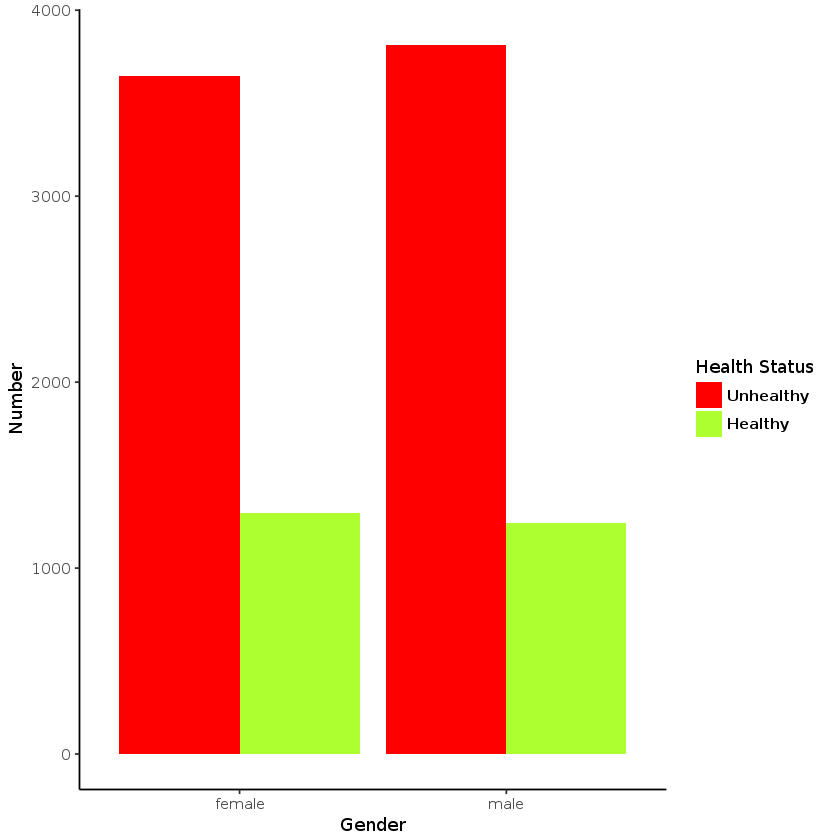

In [85]:
ggplot(data3, aes(Gender, Count_observations, fill = Health_status)) + 
geom_bar(position = "dodge", stat = "identity") + 
theme_classic(base_size=11)+ 
theme(legend.text=element_text(face='bold'))+
scale_fill_manual(values = c("red","greenyellow"),name ="Health Status",breaks=c("0","1"), labels=c("Unhealthy", "Healthy")) +
labs(y = "Number")

End notebook